In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv("C:\\Training\\Phase 1\\Dataset\\Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [32]:
df.drop('Id', axis=1, inplace=True)

In [33]:
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [34]:
X = df.drop('Species', axis=1)
y = df['Species']

In [35]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [37]:
k_values = [1, 3, 5, 7, 9]
accuracies = []

In [38]:
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    acc = knn.score(X_test, y_test)
    accuracies.append(acc)
    print(f"K={k} --> Accuracy: {acc:.4f}")

K=1 --> Accuracy: 0.9667
K=3 --> Accuracy: 1.0000
K=5 --> Accuracy: 1.0000
K=7 --> Accuracy: 1.0000
K=9 --> Accuracy: 1.0000


In [39]:
best_k = k_values[accuracies.index(max(accuracies))]
print(f"\n🔹 Best K: {best_k} with accuracy: {max(accuracies):.4f}")


🔹 Best K: 3 with accuracy: 1.0000


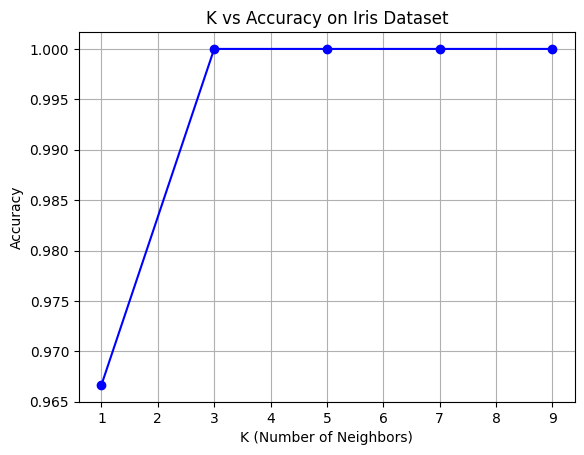

In [40]:
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='blue')
plt.xlabel("K (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.title("K vs Accuracy on Iris Dataset")
plt.grid(True)